## Assess the agreement within of a flock of particels

When a group of particles, or trajectories, join together is space, they can be considered a ''flock''. Such clusters have specific diagnostics and spatial temporal statistics, of which some are shown below. The center of mass of this flock gives a hint about XXXX.

### 0. Import of libraries

General libraries are imported, but also the specific functions which are situated in this folder

In [1]:
import os
import time

import numpy as np
import netCDF4 as nc

import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from Functions.flock_measures import normalized_cumulative_lagrangian_separation, mediod

print(time.ctime(time.time()))

Wed Jun 28 17:10:52 2023


### 1. Load the data
load the toy data, and select a subsection which is more coherent:

In [2]:
fn = 'toy_data_01.nc'
ds = nc.Dataset(os.path.join(os.pardir, 'Simulations', fn))

lat, lon = ds['lat'][:], ds['lon'][:]
tim, id = ds['time'][:], ds['trajectory'][:]

# make a selection so a relatively coherent flock is present
lat, lon, tim = lat[100:,:40], lon[100:,:40], tim[100:,:40]

### 2. Calculate the normalized cumulative lagrangian separation of a flock

This measure is in respect to a reference, in this case we take the mediod. It can be calculated in the following way:

In [3]:
id_mediod = mediod(lon.data, lat.data, spherical=True, robust=False)

c = normalized_cumulative_lagrangian_separation(lon.data, lat.data, leader_id=id_mediod, spherical=True)

### 3 Plot the data

/var/folders/23/61z3x4956y5239xt34wrmbx00000gn/T/ipykernel_22313/2253014870.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, ticks=c, shrink=0.4)


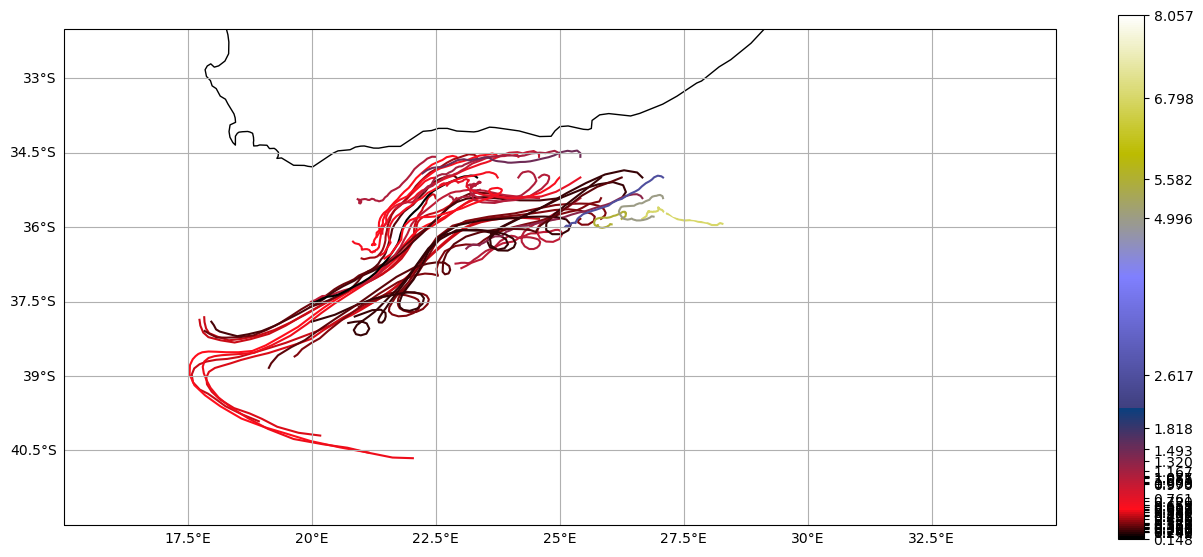

In [8]:
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_stern)
cmap.set_array([])

fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=cartopy.crs.PlateCarree())

ax1.coastlines(resolution='50m')
for i,_ in enumerate(lon.data.T):
    ax1.plot(lon.data[i,:], lat.data[i,:], c=cmap.to_rgba(c[i]))
ax1.set_xlim([15, 35])
ax1.set_ylim([-42, -32])
gl = ax1.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.colorbar(cmap, ticks=c, shrink=0.4)

plt.show();